In [2]:
import os
import shutil
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.utils import image_dataset_from_directory
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory


In [3]:
base_dir = pathlib.Path("PetImages")
new_dir = pathlib.Path("resimler")

In [4]:
cat_images = os.listdir(base_dir/"Cat")

In [5]:
cat_images[:10]

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg']

# transporting cat images to new_dir

In [6]:

subset_name = "train"
category = "Cat"
start_index = 0
end_index = 1000

In [7]:
dir = new_dir/ subset_name/ category
os.makedirs(dir, exist_ok = True)
dir 

WindowsPath('resimler/train/Cat')

In [8]:
fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
fnames[:5]

# copying images
for fname in fnames:
    shutil.copy(base_dir/ category/ fname, dir/ fname)

## create train/validation/test files

In [9]:
def make_subset(subset_name, start_index, end_index):
    """
    
    Creates a subset of images for training, validation, or testing.

    Args:
    subset_name (str): The name of the subset to create ('train', 'validation', or 'test').
    start_index (int): The starting index for the images to include in the subset.
    end_index (int): The ending index for the images to include in the subset.

    
    """
    
    # Loop over each category ('Cat' and 'Dog') to create subsets for each
    for category in ["Cat", "Dog"]:
        # Define the directory path for the current subset and category
        dir = new_dir / subset_name / category
        
        # Create the directory if it does not already exist
        os.makedirs(dir, exist_ok=True)
        
        # Generate a list of filenames based on the provided index range
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
    
        # Copy each file from the source directory to the destination subset directory
        for fname in fnames:
            shutil.copy(base_dir / category / fname, dir / fname)

# Create the 'train' subset 
make_subset("train", 0, 1000)

# Create the 'validation' subset 
make_subset("validation", 1000, 1500)

# Create the 'test' subset 
make_subset("test", 1500, 2500)


In [10]:
def clean_data(subset_name):
    """
    Cleans the dataset by removing corrupted image files.

    Args:
    subset_name (str): The name of the subset to clean ('train', 'validation', or 'test').

   
    """
    # Initialize a counter to keep track of the number of deleted files
    deleted = 0
    
    # Loop over each category ('Cat' and 'Dog') to clean subsets for each
    for category in ["Cat", "Dog"]:
        # List all files in the specified directory
        fnames = os.listdir(new_dir / subset_name / category)
        
        # Iterate over each file in the directory
        for fname in fnames:
            try:
                # Attempt to read the image file
                img_bytes = tf.io.read_file(str(new_dir / subset_name / category / fname))
                
                # Try to decode the image to ensure it is not corrupted
                decoded_img = tf.io.decode_image(img_bytes)
            
            # If there is an exception (corrupted file), remove the file
            except:
                os.remove(new_dir / subset_name / category / fname)
                
                # Increment the deleted files counter
                deleted += 1

    # Print the total number of deleted files
    print(deleted, "deleted number of files")

# Clean the 'train' subset
clean_data("train")

# Clean the 'validation' subset
clean_data("validation")

# Clean the 'test' subset
clean_data("test")


1 deleted number of files
0 deleted number of files
2 deleted number of files


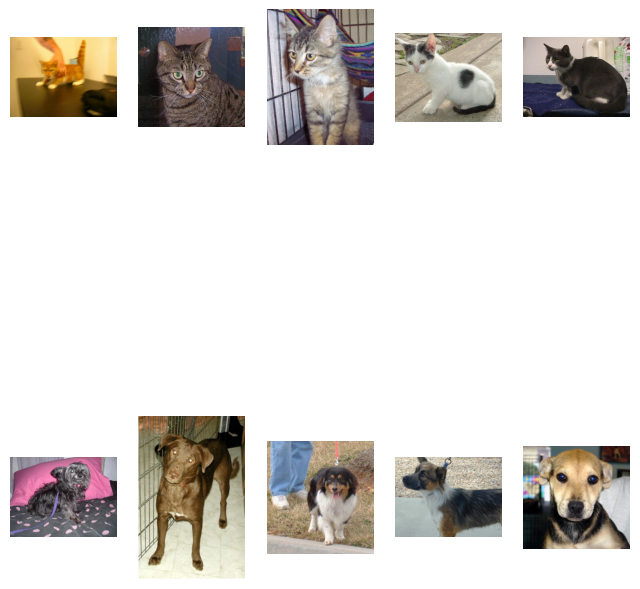

In [11]:
# loook cats and dog pictures

plt.figure(figsize = (8, 10))

for i  in range(5):
    plt.subplot(2, 5, i + 1)
    fname = str(i) + ".jpg"
    image = plt.imread(new_dir/ "train"/ "Cat"/ fname)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(2, 5, i + 1 + 5)
    fname = str(i) + ".jpg"
    image = plt.imread(new_dir/ "train"/ "Dog"/ fname)
    plt.imshow(image)
    plt.axis("off")


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

new_dir = "resimler"  

# normalization process
datagen = ImageDataGenerator(rescale = 1. / 255)

# train dataset
train_data = datagen.flow_from_directory(
    new_dir + "/train",  
    target_size = (224, 224),  
    batch_size = 32,
    class_mode = 'binary',  # Binary classification için 'binary' kullanın
    shuffle = True,
    seed = 42
)

# validation dataset
validation_data = datagen.flow_from_directory(
    new_dir + "/validation",  
    target_size = (224, 224),  
    batch_size = 32,
    class_mode = 'binary',  
    shuffle = True,
    seed = 42
)

# test dataset
test_data = datagen.flow_from_directory(
    new_dir + "/test",  
    target_size= (224, 224),  
    batch_size= 32,
    class_mode= 'binary',  
    shuffle = True,
    seed = 42
)

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1998 images belonging to 2 classes.


In [13]:


# Create model
mdl = keras.Sequential()

# Convolutional Neural Network (CNN) 
mdl.add(layers.Conv2D(128, (3, 3), activation="relu", input_shape = (224, 224, 3)))
mdl.add(layers.MaxPooling2D((2, 2)))
mdl.add(layers.Conv2D(64, (3, 3), activation = "relu"))
mdl.add(layers.MaxPooling2D((2, 2)))
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(1, activation = "sigmoid"))

# Model compiling
mdl.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# fitting model
mdl.fit(train_data, epochs = 10, validation_data = validation_data)


C:\Users\Hefes\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\Hefes\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.5267 - loss: 1.4184 - val_accuracy: 0.5950 - val_loss: 0.6819
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.6027 - loss: 0.6787 - val_accuracy: 0.5180 - val_loss: 0.6925
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5562 - loss: 0.6866 - val_accuracy: 0.5760 - val_loss: 0.6828
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.6398 - loss: 0.6386 - val_accuracy: 0.6310 - val_loss: 0.6563
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.7560 - loss: 0.5698 - val_accuracy: 0.6100 - val_loss: 0.6680
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.7964 - loss: 0.4518 - val_accuracy: 0.5870 - val_loss: 0.7719
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.9015 - loss: 0.2792 - val_accuracy: 0.5660 - val_loss: 1.1057
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.9649 - loss: 0.1265 - val_accuracy: 0.5670 - val_loss: 1.

In [14]:
mdl.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 870ms/step - accuracy: 0.5720 - loss: 2.5285


[2.5288138389587402, 0.5740740895271301]

Since our data number is very small, we will use VGG16, which is one of the transfer learning techniques developed by training on larger data sets.

## transfer learning tecnich -> VGG16

In [18]:
vgg = keras.applications.vgg16.VGG16( 
    weights = "imagenet", 
    include_top = False, 
    input_shape = (224, 224, 3)

)

vgg.trainable = False
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
# create VGG16 model

mdl = keras.Sequential()

mdl.add(vgg)
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(1, activation = "sigmoid"))


# Model compiling
mdl.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# fitting model
mdl.fit(train_data, epochs = 5, validation_data = validation_data)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 506s 8s/step - accuracy: 0.6692 - loss: 0.8527 - val_accuracy: 0.8710 - val_loss: 0.2897
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 493s 8s/step - accuracy: 0.9306 - loss: 0.1983 - val_accuracy: 0.9200 - val_loss: 0.2082
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 472s 8s/step - accuracy: 0.9772 - loss: 0.1013 - val_accuracy: 0.9140 - val_loss: 0.2014
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 477s 8s/step - accuracy: 0.9906 - loss: 0.0622 - val_accuracy: 0.9000 - val_loss: 0.2402
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 468s 7s/step - accuracy: 0.9900 - loss: 0.0466 - val_accuracy: 0.9180 - val_loss: 0.1961


## evaluate model

In [20]:
# Evaluates the performance of the trained model 'mdl' on the test dataset 'test_data'
mdl.evaluate(test_data)


63/63 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.9168 - loss: 0.1996


[0.20092342793941498, 0.9149149060249329]